# Analysis of TGA 'mesh' Data

In [1]:
"""
Preamble for most code and jupyter notebooks
@author: tobinsouth
@notebook date: 16 May 2021
"""

import numpy as np, pandas as pd

import matplotlib.pyplot as plt, seaborn as sns
import matplotlib as mpl

import math, string, re, pickle, json, time, os, sys, datetime, itertools

from collections import Counter
from tqdm import tqdm

# Set panda's options
pd.set_option("display.max_rows", 40)
pd.set_option("display.max_columns", 120)

# Better graphics
%config InlineBackend.figure_formats = ['retina']
params = {
    'axes.labelsize': 10,
    'font.size': 10,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'figure.figsize': [5.3, 3.34], # Thesis width
    'figure.dpi' : 72, 
    'font.family': "serif",
    'text.usetex': False, # Use LaTeX when desired
    }
plt.rcParams.update(params)

# Set packages to autoreload
%load_ext autoreload
%autoreload 2

In [2]:
medical_device_summary = pd.read_csv('data/medical_device_summary_key_mesh.csv')

In [3]:
len(medical_device_summary)

406

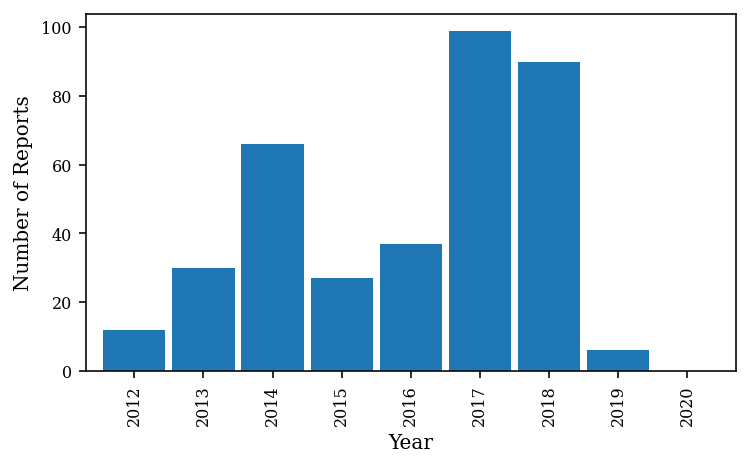

In [3]:
# year_bins = pd.to_datetime(np.linspace(pd.Timestamp('2012-01-01').value, pd.Timestamp('2021-01-01').value, 10))
# plt.hist(pd.to_datetime(medical_device_summary['Report date']), bins = year_bins)

years = pd.to_datetime(medical_device_summary['Report date']).apply(lambda y: y.year).value_counts().reset_index()
years['index'] = years['index'].apply(int)
years = years.append(pd.Series({'index':2020, 'Report date':0}), ignore_index=True)

years.sort_values('index').plot.bar(x = 'index', y = 'Report date', width = 0.9)
plt.gca().get_legend().remove()

plt.ylabel('Number of Reports')
plt.xlabel('Year')
plt.tight_layout()
plt.savefig('TGA_number_of_reports.pdf')

In [72]:
medical_device_summary['Sponsor'].value_counts()

Johnson & Johnson Medical Pty Ltd                   138
ASTORA Women's Health Australia Pty Ltd              71
Boston Scientific Pty Ltd                            51
Bard Australia Pty Ltd                               26
Getinge Australia Pty Ltd                            21
Baxter Healthcare Pty Ltd                            13
Emergo Asia Pacific Pty Ltd T/a Emergo Australia     12
Medtronic Australasia Pty Ltd                        11
American Medical Systems Australia Pty Ltd            9
-                                                     8
Alcon Laboratories Australia Pty Ltd                  8
Coloplast Pty Ltd                                     6
W L Gore & Associates (Australia) Pty Ltd             5
Allergan Australia Pty Ltd                            5
Zimmer Biomet Pty Ltd                                 5
Covidien Pty Ltd                                      5
Endotherapeutics Pty Ltd                              4
William A Cook Australia Pty Ltd                

In [79]:
Counter([t.rstrip().lstrip() for t in list(itertools.chain.from_iterable(medical_device_summary['GMDN term'].str.split(',')))])

Counter({'Mesh': 229,
         'surgical': 182,
         'polymeric': 47,
         'composite': 27,
         'Prosthesis': 27,
         'incontinence': 25,
         'Mesh kit': 36,
         'Abdominal hernia surgical mesh': 46,
         'composite-polymer': 44,
         'biodegradable': 4,
         'Silk Surgical Mesh': 1,
         'internal': 13,
         'mammary': 2,
         'gel filled': 2,
         'Silk surgical mesh': 2,
         '-': 8,
         'Abdominal Hernia surgical mesh': 1,
         'composite polymer': 1,
         'Mesh Kit': 3,
         'non-biodegradable': 16,
         'Multi-purpose surgical mesh': 18,
         'collagen': 18,
         'Fixation device': 11,
         'spine': 11,
         'construct': 11,
         'synthetic polymer': 4,
         'Barrier': 3,
         'absorbable': 3,
         'adhesion prevention': 3,
         'Dermatome': 5,
         'skin graft mesh expander': 5,
         'Biological tissue reconstructive material': 1,
         'Implantable pul

# Reports

In [27]:
with open('data/list_of_reports_mesh.pickle', 'rb') as f:
    list_of_reports = pickle.load(f)

MEDRA?
Global medical device nomeclature
Lexico calorimetre -> activi

In [100]:
list_of_reports_df = pd.DataFrame(list_of_reports)
list_of_reports_df = list_of_reports_df[list_of_reports_df['Report source category'] != 'Consumer']

In [101]:
ed = list_of_reports_df['Event description'].to_list()
others_links = [r['other medical devices reported as being used'] for r in list_of_reports]

In [102]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
from nltk import ngrams

In [104]:
one_grams = [simple_preprocess(remove_stopwords(d)) for d in ed]
bigrams = [[" ".join(gram) for gram in ngrams(sent, 2)] for sent in one_grams]
all_grams = [a+b for a,b in zip(one_grams, bigrams)]
list_of_reports_df['all_grams'] = all_grams

In [105]:
# Counter(list(itertools.chain.from_iterable(bigrams))).most_common()

In [106]:
problems = ['dehiscence', 'hernia', 'pain', 'incontinence', 'prolapse', 'pelvic_prolapse', 'complications', 'infection', 'infections', 'painful', 'seroma', 'cystocele', 'dyspareunia', 'inflammation', 'discomfort', 'stress', 'complications', 'inflammation', 'recurrence'] + \
['mesh erosion', 'pain severe', 'severe scarring', 'scarring', 'bladder syndrome', 'overactive bladder', 'incisional hernia', 'hernia recurrence', 'constant pain', 'abdominal pain', 'pain intercourse', 'nerve pain', 'stress incontinence', 'umbilical hernia', 'tract infections', 'leg pain', 'painful sex', 'urinary incontinence', 'incontinence pain', 'cystocele recurrence', 'ongoing pain', 'ability walk', 'extreme pain', 'unable sex'] 

activites = ['intercourse',  'overactive'] + ['experienced post', 'removed meshes', 'sexual intercourse']

## Word Correlations

In [107]:
CPA_activities = pd.read_csv('vocabulary/CPA_activities.csv')
all_activities = list(itertools.chain.from_iterable(CPA_activities['SPECIFIC ACTIVITIES'].str.split(',')))
all_activities.extend(CPA_activities['MAJOR HEADING'].to_list())
all_activities = list(set([a.rstrip().lstrip().lower() for a in all_activities if type(a) is str]))
all_activities.remove('')

activites = activites+all_activities

In [108]:
# https://www.nltk.org/_modules/nltk/metrics/association.html
# https://www.nltk.org/howto/collocations.html

import nltk
bigram_measures = nltk.collocations.BigramAssocMeasures() # Use for computing scores

document_set = all_grams

all_singles = list(itertools.chain.from_iterable(document_set))
all_pairs = list(itertools.chain.from_iterable([list(itertools.permutations(sent, r=2)) for sent in document_set]))

single_frequencies = nltk.FreqDist(all_singles)
pair_frequencies = nltk.FreqDist(all_pairs)
finder = nltk.collocations.BigramCollocationFinder(single_frequencies, pair_frequencies)
scores = finder.score_ngrams(bigram_measures.student_t) # likelihood_ratio

In [109]:
correlations

activity       problem      freq
0    intercourse          pain  7.763136
1           walk          pain  5.982921
2        sitting          pain  5.943065
3            sit          pain  5.212598
4          stand          pain  4.829248
..           ...           ...       ...
163    emotional          pain  0.962043
164         semi          pain  0.962043
165        touch          pain  0.962043
166  intercourse  mesh erosion  0.946111
167         walk    infections  0.940019

[168 rows x 3 columns]

In [97]:
correlations = []
for (a,b), freq in tqdm(scores):
    if (a in problems):
        if b in activites:
            correlations.append([b,a, freq])
correlations = pd.DataFrame(correlations, columns = ['activity','problem','freq'])

100%|██████████| 387847/387847 [00:00<00:00, 709752.39it/s]


In [51]:
finder.N

15567

In [55]:
scores[0]

(('mesh', 'mesh'), 27.15338009354721)

In [73]:
correlations = correlations[correlations['freq']> 1.8]

In [98]:
correlations[correlations['problem']=='dehiscence']

Empty DataFrame
Columns: [activity, problem, freq]
Index: []

In [82]:
print(correlations.duplicated().sum())
correlations = correlations.drop_duplicates() # I don't actually know why this happens

0


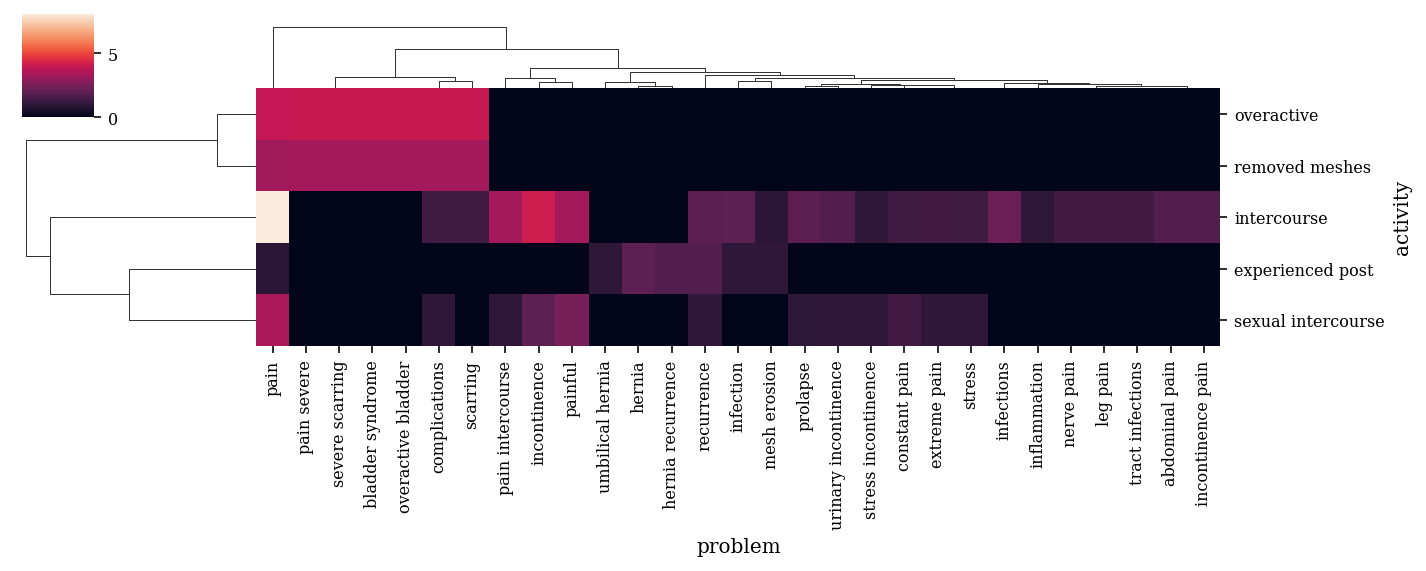

In [83]:
wide_format = correlations.pivot(index='activity', columns ='problem', values='freq').fillna(0)
sns.clustermap(wide_format, figsize=(10,4))

## Keyword Report Matching

In [107]:
has_problem = lambda tokens, problem: problem in tokens
for problem in problems:
    list_of_reports_df[problem] = list_of_reports_df['all_grams'].apply(has_problem, args = (problem,))

In [126]:
device_relations = list_of_reports_df.groupby('Trade name').apply(lambda df: df[problems].sum())

<AxesSubplot:ylabel='Trade name'>

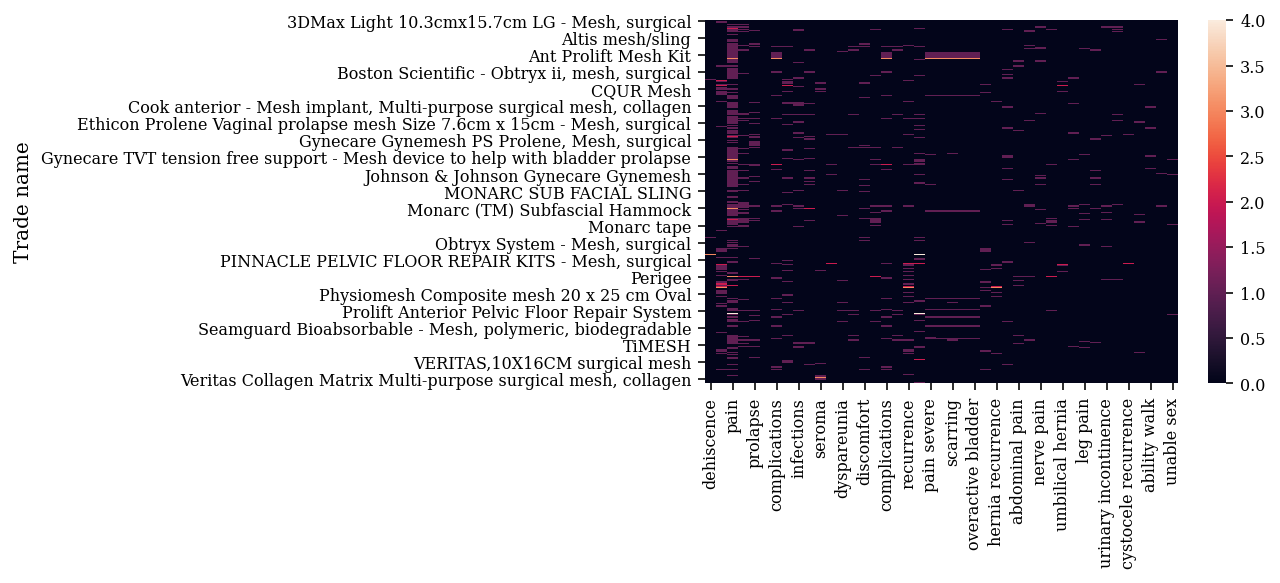

In [122]:
sns.heatmap(device_relations, color_palette)

In [124]:
list_of_reports_df.groupby('Sponsor').apply(lambda df: df[problems].sum())

dehiscence  hernia  pain  \
Sponsor                                                                      
ASTORA Women's Health Australia Pty Ltd                    0       0    57   
Alcon Laboratories Australia Pty Ltd                       0       0     0   
Allergan Australia Pty Ltd                                 0       0     0   
American Medical Systems Australia Pty Ltd                 0       0     4   
Bard Australia Pty Ltd                                     0       5     5   
Baxter Healthcare Pty Ltd                                  1       0     1   
Boston Scientific Pty Ltd                                  4       0    16   
Coloplast Pty Ltd                                          0       0     3   
Covidien Pty Ltd                                           0       0     4   
Emergo Asia Pacific Pty Ltd T/a Emergo Australia           0       0     0   
Endotherapeutics Pty Ltd                                   0       1     3   
Getinge Australia Pty Ltd                                  0      11     6   
Johnson & Johnson Medical Pty Ltd                          0      28    73   
Maquet Australia Pty Ltd                                   0       0     0   
Medical Specialties Australasia Pty Ltd                    0       0     0   
Medtronic Australasia Pty Ltd                              0       4     2   
TFS Manufacturing Pty Ltd                                  0       0     1   
W L Gore & Associates (Australia) Pty Ltd                  0       1     0   
William A Cook Australia Pty Ltd                           0       0     3   
Zimmer Biomet Pty Ltd                                      0       0     0   

                                                  incontinence  prolapse  \
Sponsor                                                                    
ASTORA Women's Health Australia Pty Ltd                     25         9   
Alcon Laboratories Australia Pty Ltd                         0         0   
Allergan Australia Pty Ltd                                   0         0   
American Medical Systems Australia Pty Ltd                   2         0   
Bard Australia Pty Ltd                                       0         0   
Baxter Healthcare Pty Ltd                                    0         0   
Boston Scientific Pty Ltd                                    3         2   
Coloplast Pty Ltd                                            0         1   
Covidien Pty Ltd                                             1         0   
Emergo Asia Pacific Pty Ltd T/a Emergo Australia             0         0   
Endotherapeutics Pty Ltd                                     0         1   
Getinge Australia Pty Ltd                                    0         0   
Johnson & Johnson Medical Pty Ltd                           12        18   
Maquet Australia Pty Ltd                                     0         0   
Medical Specialties Australasia Pty Ltd                      0         0   
Medtronic Australasia Pty Ltd                                0         0   
TFS Manufacturing Pty Ltd                                    1         0   
W L Gore & Associates (Australia) Pty Ltd                    0         0   
William A Cook Australia Pty Ltd                             0         0   
Zimmer Biomet Pty Ltd                                        0         0   

                                                  pelvic_prolapse  \
Sponsor                                                             
ASTORA Women's Health Australia Pty Ltd                         0   
Alcon Laboratories Australia Pty Ltd                            0   
Allergan Australia Pty Ltd                                      0   
American Medical Systems Australia Pty Ltd                      0   
Bard Australia Pty Ltd                                          0   
Baxter Healthcare Pty Ltd                                       0   
Boston Scientific Pty Ltd                                       0   
Coloplast Pty Ltd                      

# Wordcloud

In [129]:
from wordcloud import WordCloud

all_grams_counts = Counter(list(itertools.chain.from_iterable(one_grams)))
stopwords = WordCloud().stopwords
wordcloud = WordCloud(width=1600, height=993, background_color='white').fit_words({w:c for w,c in all_grams_counts.items() if w not in stopwords})

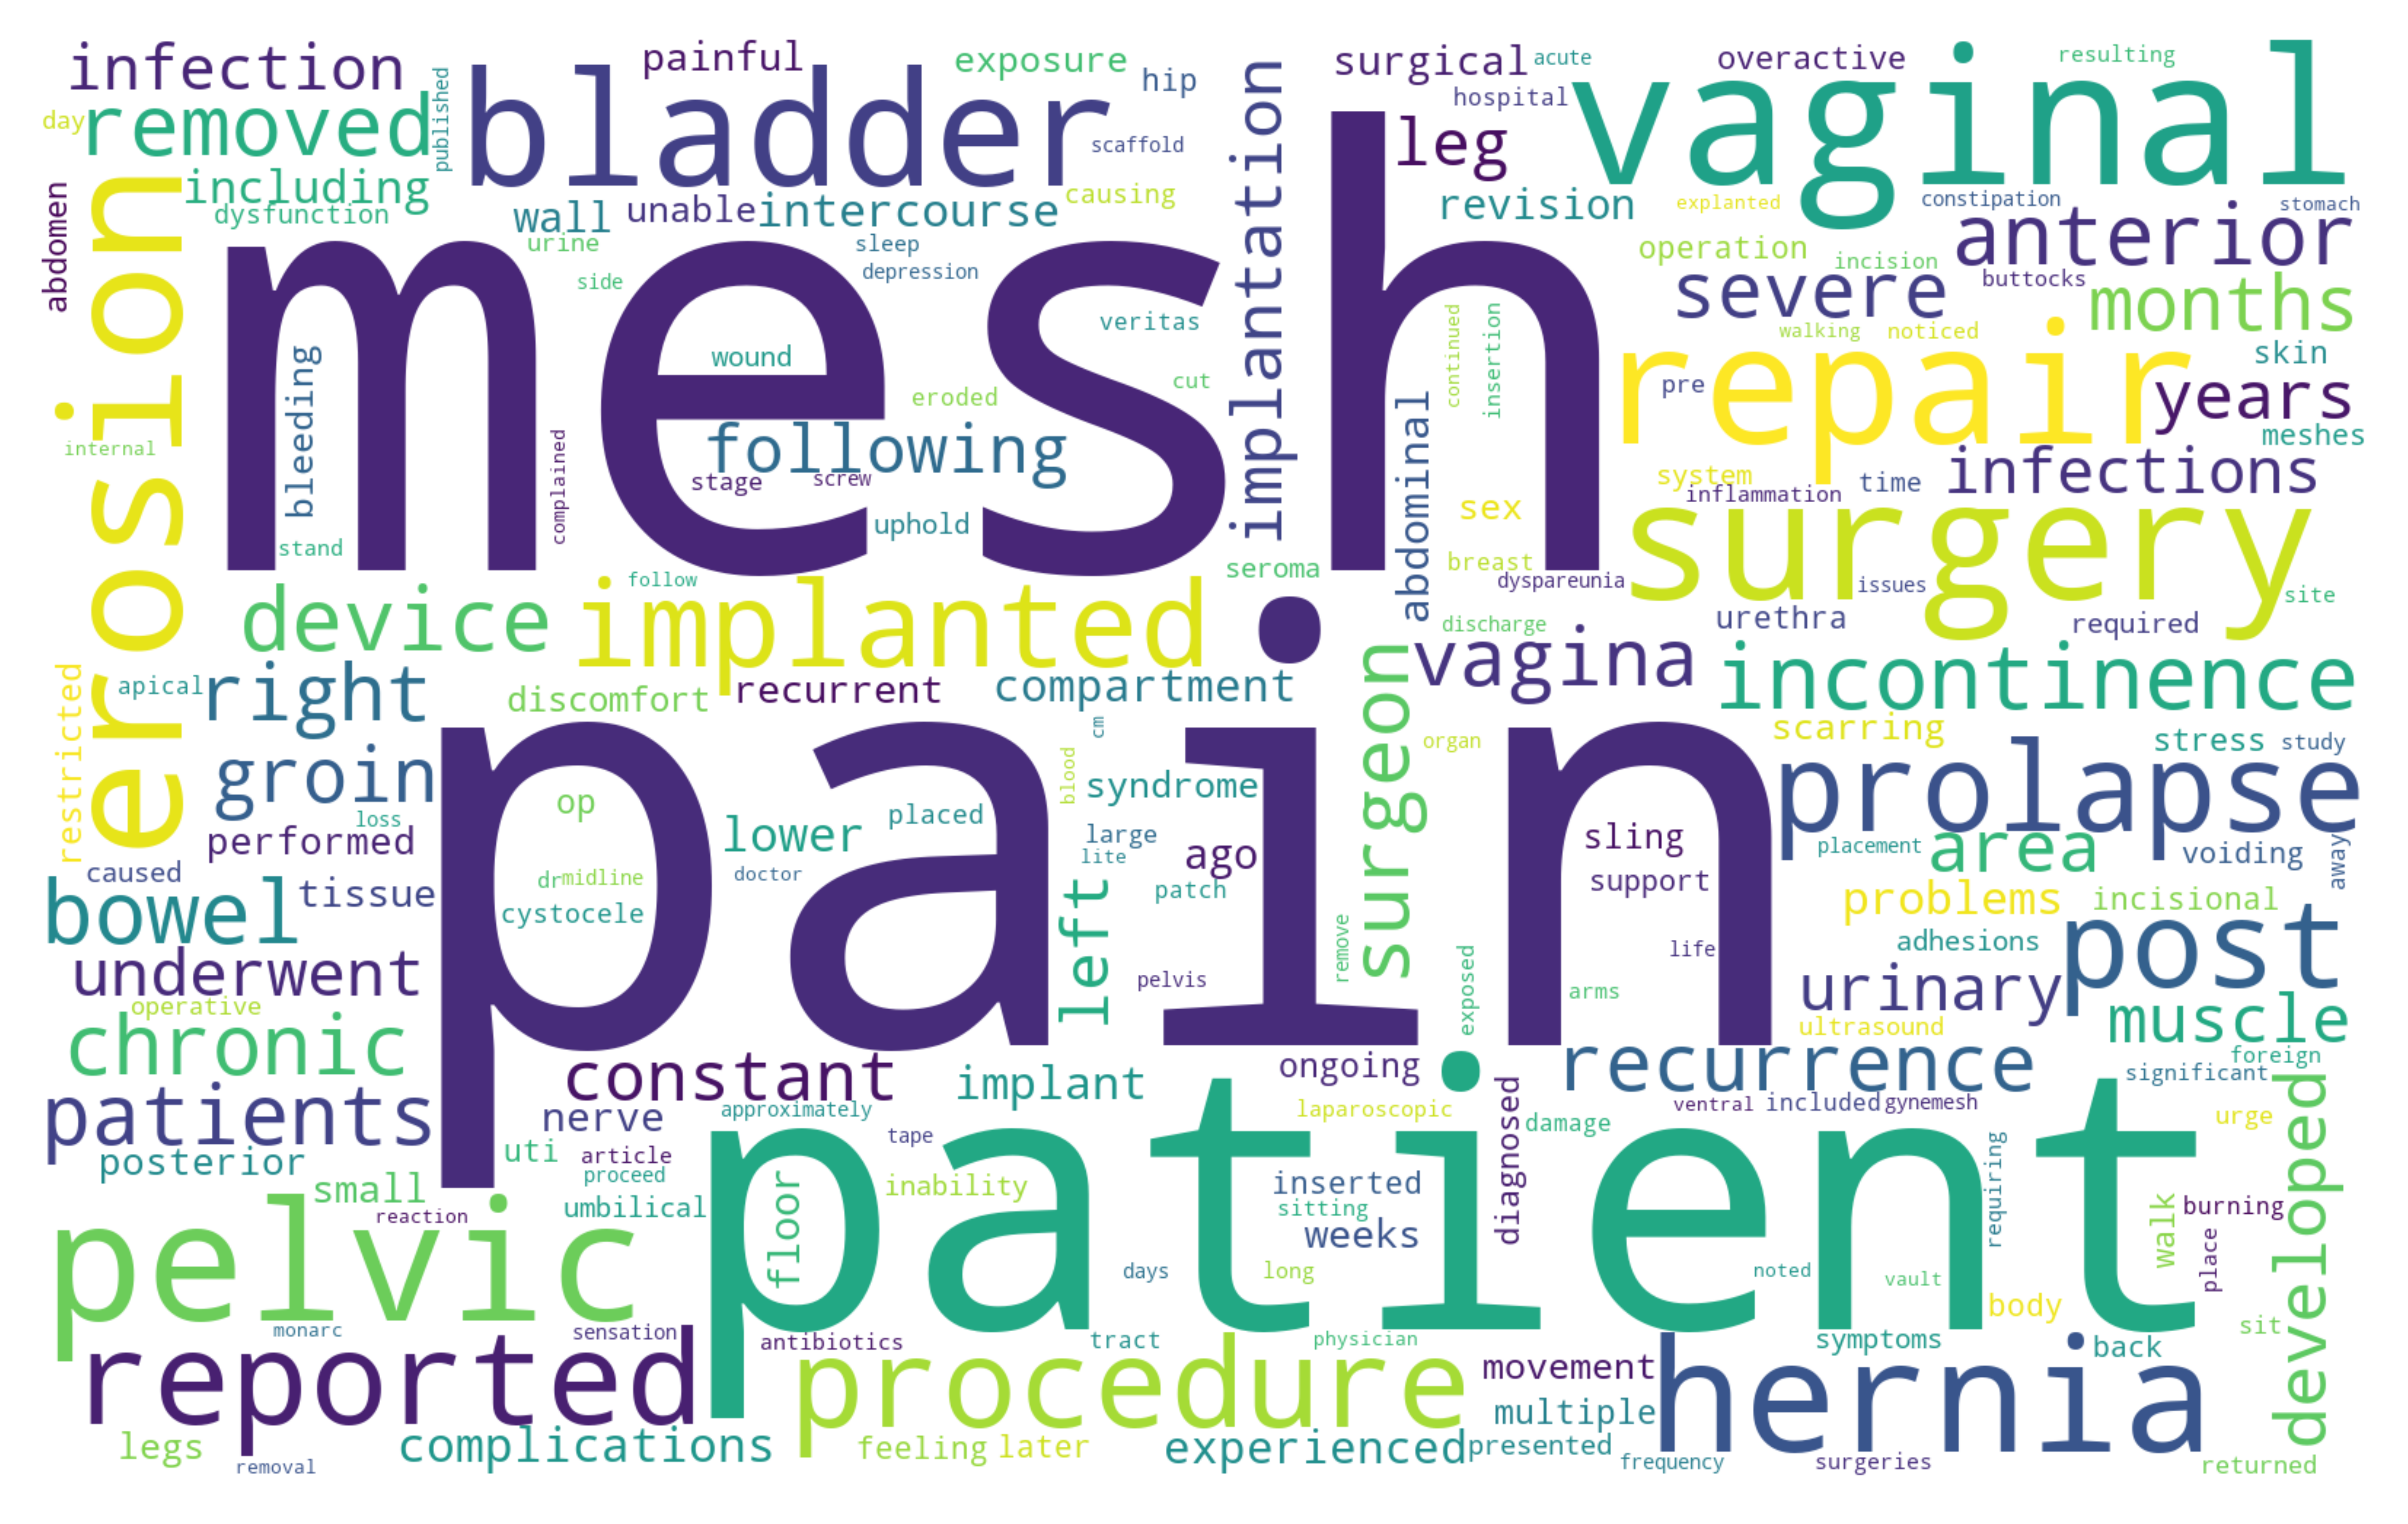

In [131]:
from wordcloud import WordCloud

all_grams_counts = Counter(list(itertools.chain.from_iterable(one_grams)))
stopwords = WordCloud().stopwords
wordcloud = WordCloud(width=1600, height=993, background_color='white').fit_words({w:c for w,c in all_grams_counts.items() if w not in stopwords})

plt.figure(figsize = (6, 3.727), facecolor = None, dpi=500)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()